In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os

dataset_path = "/content/drive/MyDrive/Datasets/Almeno20/"
first_print_path = os.path.join(dataset_path, "First Print")
second_print_path = os.path.join(dataset_path, "Second Print")

print("First Print Directory:", first_print_path)
print("Second Print Directory:", second_print_path)


First Print Directory: /content/drive/MyDrive/Datasets/Almeno20/First Print
Second Print Directory: /content/drive/MyDrive/Datasets/Almeno20/Second Print


In [5]:
!pip uninstall -y scikit-image && pip install --no-cache-dir scikit-image
import skimage.feature
print(dir(skimage.feature))



Found existing installation: scikit-image 0.25.2
Uninstalling scikit-image-0.25.2:
  Successfully uninstalled scikit-image-0.25.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 182.9 MB/s eta 0:00:00
['BRIEF', 'CENSURE', 'Cascade', 'ORB', 'SIFT', 'blob_dog', 'blob_doh', 'blob_log', 'canny', 'corner_fast', 'corner_foerstner', 'corner_harris', 'corner_kitchen_rosenfeld', 'corner_moravec', 'corner_orientations', 'corner_peaks', 'corner_shi_tomasi', 'corner_subpix', 'daisy', 'draw_haar_like_feature', 'draw_multiblock_lbp', 'fisher_vector', 'graycomatrix', 'graycoprops', 'haar_like_feature', 'haar_like_feature_coord', 'hessian_matrix', 'hessian_matrix_det', 'hessian_matrix_eigvals', 'hog', 'learn_gmm', 'local_binary_pattern', 'match_descriptors', 'match_template', 'multiblock_lbp', 'multiscale_basic_features', 'peak_local_max', 'plot_matched_features', 'shape_index', 'structure_tensor', 'structure_tensor_eigenvalues']


In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.feature import graycomatrix, graycoprops
from skimage.filters import sobel
from skimage import io
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

[array([[196, 181, 155, ...,  31,  37,  49],
       [172, 134,  84, ...,  16,  18,  20],
       [124,  61,  26, ...,  15,  16,  13],
       ...,
       [ 42,   6,   9, ...,   3,   2,   2],
       [ 44,   5,   4, ...,   1,   2,  13],
       [ 50,   6,   0, ...,  20,  27,  60]], dtype=uint8), array([[253, 240, 211, ..., 197, 217, 226],
       [243, 209, 151, ..., 146, 195, 222],
       [235, 166,  77, ...,  95, 164, 211],
       ...,
       [195, 131,  85, ..., 110, 170, 209],
       [226, 194, 163, ..., 164, 194, 212],
       [241, 232, 223, ..., 196, 205, 213]], dtype=uint8), array([[252, 251, 252, ..., 166, 170, 174],
       [251, 251, 250, ...,  52,  57,  65],
       [252, 251, 239, ...,   0,   0,   2],
       ...,
       [249, 245, 207, ...,   0,   0,   0],
       [249, 248, 228, ...,   0,   0,   1],
       [248, 246, 240, ...,   0,   5,  26]], dtype=uint8), array([[193, 180, 164, ..., 174, 181, 185],
       [191, 176, 158, ..., 163, 169, 168],
       [192, 175, 156, ..., 138, 140, 

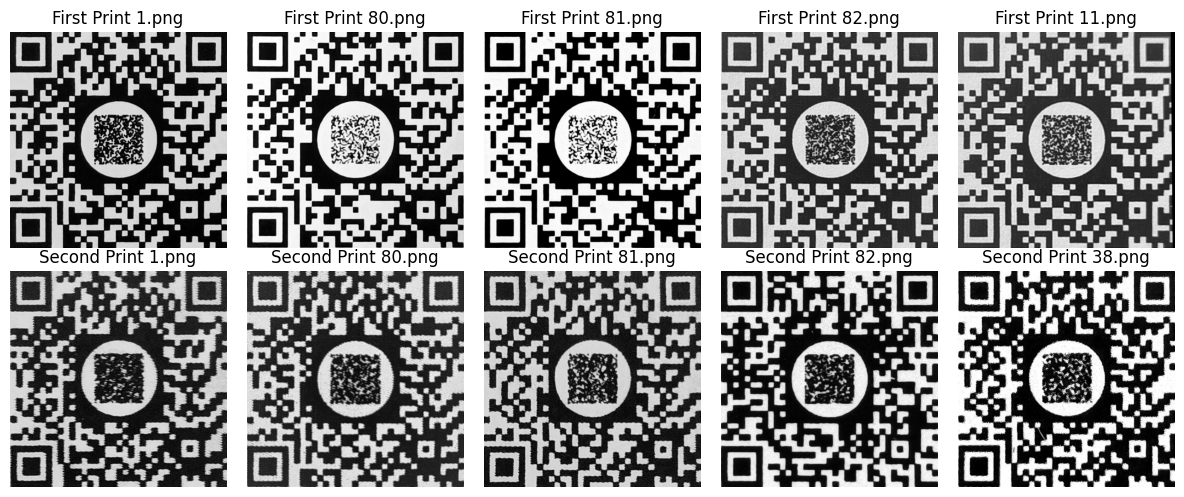

In [7]:
# loading the images
def load_images(folder, num_samples=5):
    images = []
    filenames = os.listdir(folder)[:num_samples]  # Load only a few images for visualization
    for file in filenames:
        img = cv2.imread(os.path.join(folder, file), cv2.IMREAD_GRAYSCALE)  # Load in grayscale
        images.append(img)
    return images, filenames
first_prints, first_filenames = load_images(first_print_path)
second_prints, second_filenames = load_images(second_print_path)
print(first_prints,"\n",second_filenames,"\n")

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i in range(5):
    axes[0, i].imshow(first_prints[i], cmap='gray')
    axes[0, i].set_title(f"First Print {first_filenames[i]}")
    axes[0, i].axis('off')

    axes[1, i].imshow(second_prints[i], cmap='gray')
    axes[1, i].set_title(f"Second Print {second_filenames[i]}")
    axes[1, i].axis('off')
plt.tight_layout()
plt.show()

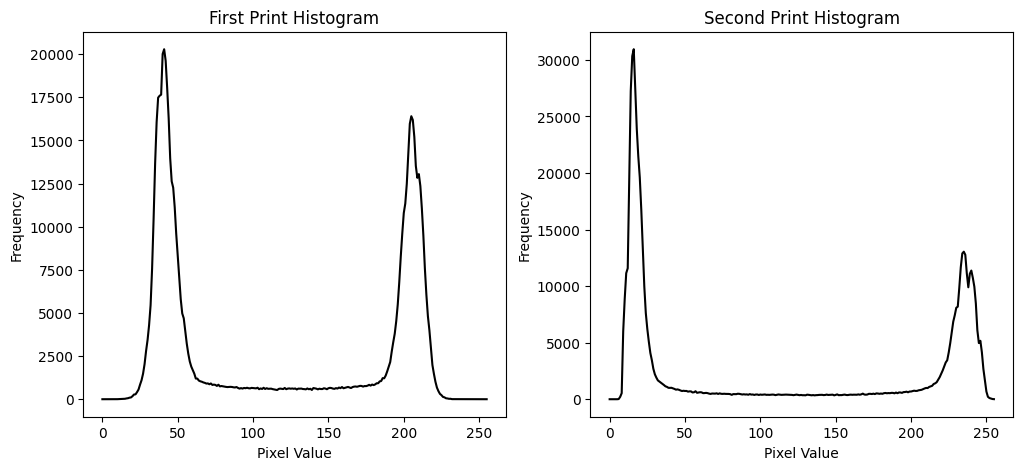

In [8]:
# Histogram of pixel intensities
def plot_histogram(image, title):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(hist, color='black')
    plt.title(title)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_histogram(first_prints[3], "First Print Histogram")

plt.subplot(1, 2, 2)
plot_histogram(second_prints[3], "Second Print Histogram")

plt.show()


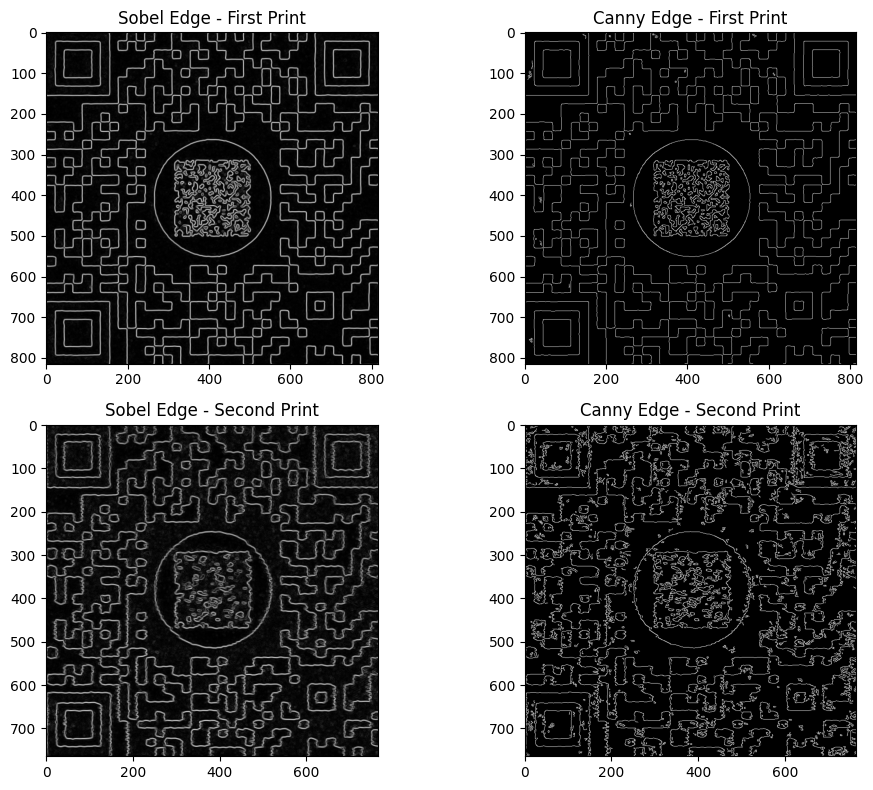

In [9]:
# Edge Detection
def edge_detection(image):
    sobel_edges = sobel(image)
    canny_edges = cv2.Canny(image, 50, 150)
    return sobel_edges, canny_edges

# Apply edge detection to one pair of images
sobel_first, canny_first = edge_detection(first_prints[0])
sobel_second, canny_second = edge_detection(second_prints[0])

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes[0, 0].imshow(sobel_first, cmap='gray')
axes[0, 0].set_title("Sobel Edge - First Print")

axes[0, 1].imshow(canny_first, cmap='gray')
axes[0, 1].set_title("Canny Edge - First Print")

axes[1, 0].imshow(sobel_second, cmap='gray')
axes[1, 0].set_title("Sobel Edge - Second Print")

axes[1, 1].imshow(canny_second, cmap='gray')
axes[1, 1].set_title("Canny Edge - Second Print")

plt.tight_layout()
plt.show()


In [10]:
# Texture Analysis
def compute_glcm_features(image):
    glcm = graycomatrix(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    return contrast, energy, homogeneity

# Compute GLCM features
glcm_first = compute_glcm_features(first_prints[0])
glcm_second = compute_glcm_features(second_prints[0])

print("GLCM Features - First Print:", glcm_first)
print("GLCM Features - Second Print:", glcm_second)


GLCM Features - First Print: (np.float64(280.21384362611354), np.float64(0.0637573896116402), np.float64(0.43992515373503277))
GLCM Features - Second Print: (np.float64(142.0850597132396), np.float64(0.0364086898633139), np.float64(0.29710929549327536))


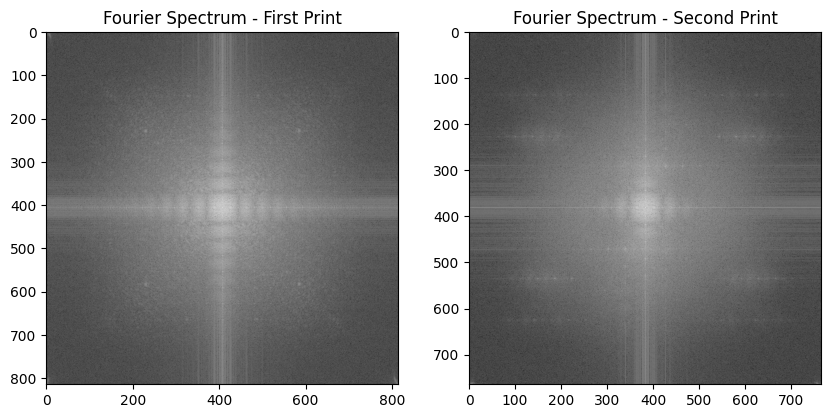

In [11]:
# fourier transform
def fourier_transform(image):
    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)
    magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))
    return magnitude_spectrum

# Apply Fourier Transform
fourier_first = fourier_transform(first_prints[0])
fourier_second = fourier_transform(second_prints[0])

# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(fourier_first, cmap='gray')
axes[0].set_title("Fourier Spectrum - First Print")

axes[1].imshow(fourier_second, cmap='gray')
axes[1].set_title("Fourier Spectrum - Second Print")

plt.show()


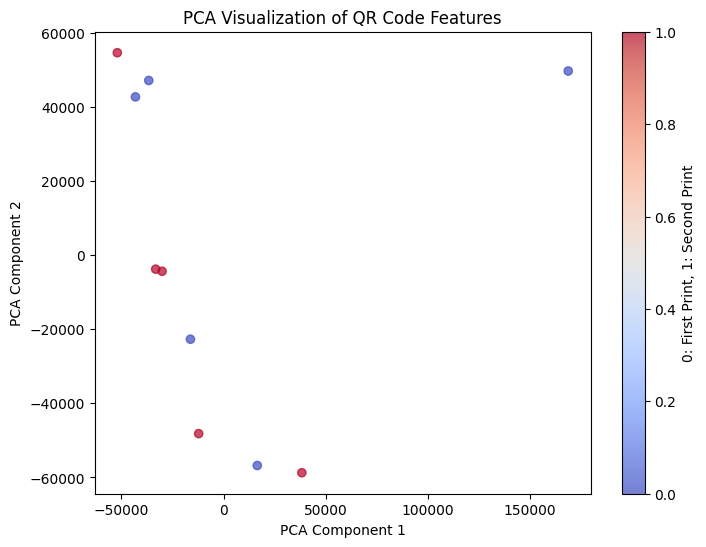

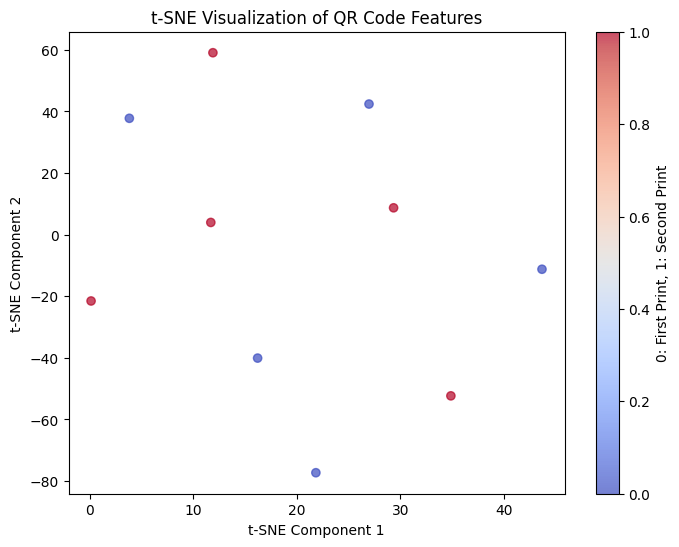

In [12]:
def extract_features(image):
    # Compute histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()
    # Compute GLCM features
    glcm_features = compute_glcm_features(image)
    return np.hstack((hist, glcm_features))

# Prepare data for PCA/t-SNE
num_samples = min(len(first_prints), len(second_prints))
all_images = first_prints[:num_samples] + second_prints[:num_samples]
labels = [0] * num_samples + [1] * num_samples  # 0 = First Print, 1 = Second Print

features = np.array([extract_features(img) for img in all_images])

# PCA Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='coolwarm', alpha=0.7)
plt.title("PCA Visualization of QR Code Features")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="0: First Print, 1: Second Print")
plt.show()

# t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_result = tsne.fit_transform(features)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='coolwarm', alpha=0.7)
plt.title("t-SNE Visualization of QR Code Features")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="0: First Print, 1: Second Print")
plt.show()


In [13]:
!pip install opencv-python numpy scikit-image matplotlib


In [14]:
import os

def rename_and_sort(folder):
    files = sorted(os.listdir(folder))  # Sort alphabetically
    for index, file in enumerate(files, start=1):
        ext = file.split('.')[-1]  # Keep original extension
        new_name = f"{index}.{ext}"
        os.rename(os.path.join(folder, file), os.path.join(folder, new_name))
        print(f"Renamed: {file} ➝ {new_name}")

# Set paths
dataset_path = "/content/drive/MyDrive/Datasets/Almeno20/"
first_print_path = os.path.join(dataset_path, "First Print")
second_print_path = os.path.join(dataset_path, "Second Print")

# Rename in both folders
rename_and_sort(first_print_path)
rename_and_sort(second_print_path)

print("✅ Renaming Completed!")


Renamed: 1.png ➝ 1.png
Renamed: 10.png ➝ 2.png
Renamed: 11.png ➝ 3.png
Renamed: 12.png ➝ 4.png
Renamed: 13.png ➝ 5.png
Renamed: 14.png ➝ 6.png
Renamed: 15.png ➝ 7.png
Renamed: 16.png ➝ 8.png
Renamed: 17.png ➝ 9.png
Renamed: 18.png ➝ 10.png
Renamed: 19.png ➝ 11.png
Renamed: 20.png ➝ 12.png
Renamed: 21.png ➝ 13.png
Renamed: 22.png ➝ 14.png
Renamed: 23.png ➝ 15.png
Renamed: 24.png ➝ 16.png
Renamed: 25.png ➝ 17.png
Renamed: 26.png ➝ 18.png
Renamed: 27.png ➝ 19.png
Renamed: 28.png ➝ 20.png
Renamed: 29.png ➝ 21.png
Renamed: 30.png ➝ 22.png
Renamed: 31.png ➝ 23.png
Renamed: 32.png ➝ 24.png
Renamed: 33.png ➝ 25.png
Renamed: 34.png ➝ 26.png
Renamed: 35.png ➝ 27.png
Renamed: 36.png ➝ 28.png
Renamed: 37.png ➝ 29.png
Renamed: 38.png ➝ 30.png
Renamed: 39.png ➝ 31.png
Renamed: 40.png ➝ 32.png
Renamed: 41.png ➝ 33.png
Renamed: 42.png ➝ 34.png
Renamed: 43.png ➝ 35.png
Renamed: 44.png ➝ 36.png
Renamed: 45.png ➝ 37.png
Renamed: 46.png ➝ 38.png
Renamed: 47.png ➝ 39.png
Renamed: 48.png ➝ 40.png
Renamed: 4

In [15]:
def load_images(folder, num_samples=5):
    images = []
    filenames = sorted(os.listdir(folder))[:num_samples]  # Load sorted filenames
    for file in filenames:
        img = cv2.imread(os.path.join(folder, file), cv2.IMREAD_GRAYSCALE)  # Load in grayscale
        images.append(img)
    return images, filenames

first_prints, first_filenames = load_images(first_print_path)
second_prints, second_filenames = load_images(second_print_path)

print("✅ Files Matched Successfully!")


✅ Files Matched Successfully!


In [16]:
import os

def load_images(folder, num_samples=5):
    images = []
    filenames = sorted(os.listdir(folder))[:num_samples]  # Sort to maintain order
    filepaths = [os.path.abspath(os.path.join(folder, file)) for file in filenames]  # Absolute path

    for path in filepaths:
        if not os.path.exists(path):  # Check if file exists
            print(f"File not found: {path}")
            continue
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
        else:
            print(f"Warning: Could not read {path}")

    return images, filepaths  # Return full paths

# Load images again
first_prints, first_filenames = load_images(first_print_path)
second_prints, second_filenames = load_images(second_print_path)


In [17]:
def extract_features(image_path):
    print(f"Processing: {image_path}")  # Debugging line
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Error: Unable to load {image_path}")  # Check if the path is correct
        return None  # Skip this file if it cannot be read

    img_resized = cv2.resize(img, (256, 256))  # Resize to standard dimensions
    img_blur = cv2.GaussianBlur(img_resized, (3, 3), 0)  # Apply Gaussian blur
    return img_blur  # Return processed image for further feature extraction
def load_images(folder, num_samples=5):
    images = []
    filenames = os.listdir(folder)[:num_samples]
    filepaths = [os.path.join(folder, file) for file in filenames]  # Convert to full path

    for path in filepaths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
        else:
            print(f"Warning: Could not read {path}")

    return images, filepaths  # Return full file paths instead of just names
features_list = [extract_features(img_path) for img_path in first_filenames]


Processing: /content/drive/MyDrive/Datasets/Almeno20/First Print/1.png
Processing: /content/drive/MyDrive/Datasets/Almeno20/First Print/10.png
Processing: /content/drive/MyDrive/Datasets/Almeno20/First Print/11.png
Processing: /content/drive/MyDrive/Datasets/Almeno20/First Print/12.png
Processing: /content/drive/MyDrive/Datasets/Almeno20/First Print/13.png


In [18]:
import numpy as np
import cv2
import pandas as pd
from skimage.feature import graycomatrix, graycoprops
from skimage.filters import sobel
from scipy.fftpack import fft2

def extract_features(image):
    """Extracts various features from a QR image."""
    features = {}

    # Convert to grayscale if needed
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 1️⃣ Global features (Brightness, Contrast)
    features['mean_intensity'] = np.mean(image)
    features['std_dev_intensity'] = np.std(image)

    # 2️⃣ Edge detection (QR sharpness)
    edges = sobel(image)
    features['edge_intensity'] = np.mean(edges)

    # 3️⃣ Texture features (GLCM - Gray Level Co-occurrence Matrix)
    glcm = graycomatrix(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    features['contrast'] = graycoprops(glcm, 'contrast')[0, 0]
    features['dissimilarity'] = graycoprops(glcm, 'dissimilarity')[0, 0]

    # 4️⃣ Frequency domain analysis (Fourier Transform)
    fft_image = np.abs(fft2(image))
    features['fft_mean'] = np.mean(fft_image)
    features['fft_std'] = np.std(fft_image)

    return features

# Process each image and extract features
feature_list = []
for img in first_prints:
    feature_list.append(extract_features(img))

# Convert to a DataFrame and save
df_features = pd.DataFrame(feature_list)
df_features.to_csv("qr_features.csv", index=False)
print(df_features)
print("✅ Features extracted and saved as qr_features.csv")


   mean_intensity  std_dev_intensity  edge_intensity    contrast  \
0       98.477146          93.385137        0.055777  280.213844   
1      135.031672         118.863802        0.055195  324.752780   
2      109.132387          88.975712        0.058803  277.462735   
3      132.468147         112.874323        0.060912  323.240298   
4      133.995430         118.708600        0.061854  425.175773   

   dissimilarity      fft_mean        fft_std  
0       6.020781  12250.778386  109927.102513  
1       5.642494  14452.123494  165412.802423  
2       6.569714  11300.938560  109104.790860  
3       6.279895  11985.762998  133295.661915  
4       6.328945  14750.715531  149287.922433  
✅ Features extracted and saved as qr_features.csv


In [19]:
features_list = [extract_features(img_path) for img_path in second_prints]
feature_list = []
for img in second_prints:
    feature_list.append(extract_features(img))

# Convert to a DataFrame and save
df_features = pd.DataFrame(feature_list)
df_features.to_csv("qr_features_second.csv", index=False)
print(df_features)
print("✅ Features extracted and saved as qr_features_second.csv")


   mean_intensity  std_dev_intensity  edge_intensity    contrast  \
0       97.371073          82.497797        0.059609  142.085060   
1      113.681854          75.727156        0.049233  110.532331   
2      101.152139          85.010207        0.057066  213.202100   
3       91.693634          91.289812        0.065091  316.783616   
4      109.962327         115.273864        0.057748  318.894589   

   dissimilarity      fft_mean        fft_std  
0       6.245279  10281.066366   97086.901322  
1       5.651065   9465.662866  122433.450268  
2       6.600452  10653.536524   99453.872109  
3       7.368807  12318.662249   92081.065054  
4       6.265586  13889.078850  131816.479830  
✅ Features extracted and saved as qr_features_second.csv


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load CSV files
df_first = pd.read_csv("/content/qr_features.csv")
df_second = pd.read_csv("/content/qr_features_second.csv")

# Assign labels
df_first["label"] = 0  # First Print (Real QR Code)
df_second["label"] = 1  # Second Print (Scanned QR Code)

# Concatenate datasets
df = pd.concat([df_first, df_second], ignore_index=True)

# Split features and labels
X = df.drop(columns=["label"])
y = df["label"]

# Normalize feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data successfully prepared for training!")


Data successfully prepared for training!


In [21]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train SVM
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("\nSVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



SVM Model Performance:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Random Forest Performance:
Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Paths to First Print (Real) and Second Print (Scanned)
first_print_path = "/content/drive/MyDrive/Datasets/Almeno20/First Print"
second_print_path = "/content/drive/MyDrive/Datasets/Almeno20/Second Print"

# Image size for CNN
IMG_SIZE = 128

# Function to load images and assign labels
def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize
            images.append(img)
            labels.append(label)
    return images, labels

# Load both datasets
X_first, y_first = load_images_from_folder(first_print_path, 0)
X_second, y_second = load_images_from_folder(second_print_path, 1)

# Combine datasets
X = np.array(X_first + X_second) / 255.0  # Normalize to [0,1]
y = np.array(y_first + y_second)

# Reshape for CNN input (batch_size, height, width, channels)
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Convert labels to categorical for CNN
y_categorical = to_categorical(y, num_classes=2)

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

print(f"Dataset Loaded! Training Samples: {len(X_train)}, Testing Samples: {len(X_test)}")


Dataset Loaded! Training Samples: 118, Testing Samples: 30


In [23]:
from sklearn.svm import SVC
from skimage.feature import hog

# Function to extract HOG features
def extract_hog_features(images):
    features = []
    for img in images:
        hog_feat = hog(img.squeeze(), pixels_per_cell=(8,8), cells_per_block=(2,2), feature_vector=True)
        features.append(hog_feat)
    return np.array(features)

# Extract HOG features
X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

# Train SVM
svm_model = SVC(kernel="linear")
svm_model.fit(X_train_hog, np.argmax(y_train, axis=1))

# Evaluate SVM
y_pred_svm = svm_model.predict(X_test_hog)
accuracy_svm = np.mean(y_pred_svm == np.argmax(y_test, axis=1))
print(f"\nSVM Model Accuracy: {accuracy_svm * 100:.2f}%")
import joblib
joblib.dump(svm_model, 'svm_model.joblib')



SVM Model Accuracy: 100.00%


['svm_model.joblib']

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
cnn_model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(128, 128, 1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(2, activation="softmax")  # 2 classes (First Print, Second Print)
])

# Compile the model
cnn_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
cnn_model.fit(X_train, y_train, epochs=15, batch_size=16, validation_data=(X_test, y_test))

# Evaluate CNN
test_loss, test_acc = cnn_model.evaluate(X_test, y_test)
print(f"\nCNN Model Accuracy: {test_acc * 100:.2f}%")
joblib.dump(cnn_model, 'cnn_model.joblib')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5222 - loss: 0.9251 - val_accuracy: 0.4333 - val_loss: 0.6967
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 440ms/step - accuracy: 0.4966 - loss: 0.6972 - val_accuracy: 0.4333 - val_loss: 0.6920
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 443ms/step - accuracy: 0.5323 - loss: 0.6817 - val_accuracy: 0.6667 - val_loss: 0.6507
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 548ms/step - accuracy: 0.7438 - loss: 0.6456 - val_accuracy: 0.6667 - val_loss: 0.5883
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 448ms/step - accuracy: 0.6040 - loss: 0.6101 - val_accuracy: 0.6000 - val_loss: 0.5702
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 476ms/step - accuracy: 0.8050 - loss: 0.4929 - val_accuracy: 0.9000 - val_loss: 0.3067
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 497ms/step - accuracy: 0.8237 - loss: 0.3168 - val_accuracy: 0.9333 - val_loss: 0.2069
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 449ms/step - accuracy: 0.8883 - loss: 0.3599 - val_accuracy: 0.9333 - val_loss: 

['cnn_model.joblib']

In [25]:
from sklearn.metrics import accuracy_score, classification_report

# SVM Predictions
y_pred_svm = svm_model.predict(X_test_hog)

# CNN Predictions
y_pred_cnn = np.argmax(cnn_model.predict(X_test), axis=1)

# Convert true labels back from one-hot encoding
y_true = np.argmax(y_test, axis=1)

# Print Performance
print("\n--- SVM Results ---")
print(f"Accuracy: {accuracy_score(y_true, y_pred_svm) * 100:.2f}%")
print(classification_report(y_true, y_pred_svm))

print("\n--- CNN Results ---")
print(f"Accuracy: {accuracy_score(y_true, y_pred_cnn) * 100:.2f}%")
print(classification_report(y_true, y_pred_cnn))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step

--- SVM Results ---
Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


--- CNN Results ---
Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [26]:
import matplotlib.pyplot as plt

# Find misclassified images
misclassified = np.where(y_true != y_pred_cnn)[0]

# Plot some misclassified images
plt.figure(figsize=(10,5))
for i, idx in enumerate(misclassified[:5]):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[idx].squeeze(), cmap="gray")
    plt.title(f"True: {y_true[idx]}, Pred: {y_pred_cnn[idx]}")
    plt.axis("off")
plt.show()


<Figure size 1000x500 with 0 Axes>

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Paths to datasets
first_print_path = "/content/drive/MyDrive/Datasets/Almeno20/First Print"
second_print_path = "/content/drive/MyDrive/Datasets/Almeno20/Second Print"

# Image Parameters
IMG_SIZE = 128  # Resize all images to 128x128

# Load images and labels
def load_images_from_folder(folder, label, num_samples=None):
    images, labels = [], []
    filenames = os.listdir(folder)[:num_samples] if num_samples else os.listdir(folder)

    for file in filenames:
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
        if img is None:
            print(f"Error loading image: {img_path}")
            continue
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to fixed dimensions
        images.append(img.flatten())  # Flatten image to 1D array
        labels.append(label)

    return np.array(images), np.array(labels)

# Load data
first_images, first_labels = load_images_from_folder(first_print_path, label=0)
second_images, second_labels = load_images_from_folder(second_print_path, label=1)

# Merge data
X = np.vstack((first_images, second_images))
y = np.hstack((first_labels, second_labels))

# Normalize pixel values (0 to 1)
X = X / 255.0

# One-hot encode labels
y_cat = to_categorical(y, num_classes=2)

# Split data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42, stratify=y)

# Create MirroredStrategy for multi-GPU training
strategy = tf.distribute.MirroredStrategy()
print(f"Number of devices: {strategy.num_replicas_in_sync}")

# Build & compile model inside strategy scope
with strategy.scope():
    model = Sequential([
        Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(y_cat.shape[1], activation='softmax')  # 2 output classes
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")
# Print predictions




Number of devices: 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 383ms/step - accuracy: 0.5014 - loss: 1.5376 - val_accuracy: 0.6667 - val_loss: 3.6925
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - accuracy: 0.5436 - loss: 5.6298 - val_accuracy: 0.3333 - val_loss: 2.6318
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - accuracy: 0.5486 - loss: 3.0516 - val_accuracy: 0.5000 - val_loss: 1.6035
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - accuracy: 0.5777 - loss: 3.5318 - val_accuracy: 0.5833 - val_loss: 0.7250
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - accuracy: 0.5603 - loss: 2.0581 - val_accuracy: 0.3333 - val_loss: 1.3104
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - accuracy: 0.5199 - loss: 2.3248 - val_accuracy: 0.3333 - val_loss: 1.0463
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 348ms/step - accuracy: 0.5557 - loss: 2.1635 - val_accuracy: 0.3333 - val_loss: 0.8379
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 330ms/step - accuracy: 0.5671 - loss: 1.5135 - val_accuracy: 0.3333 - v

In [ ]:


# Load images and labels
def load_images_from_folder(folder, label, num_samples=None):
    images, labels = [], []
    filenames = os.listdir(folder)[:num_samples] if num_samples else os.listdir(folder)

    for file in filenames:
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
        if img is None:
            print(f"Error loading image: {img_path}")
            continue
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to fixed dimensions
        images.append(img.flatten())  # Flatten image to 1D array
        labels.append(label)

    return np.array(images), np.array(labels)

# Load data
first_images, first_labels = load_images_from_folder(first_print_path, label=0)
second_images, second_labels = load_images_from_folder(second_print_path, label=1)

# Merge data
X = np.vstack((first_images, second_images))
y = np.hstack((first_labels, second_labels))

# Normalize pixel values (0 to 1)
X = X / 255.0

# One-hot encode labels
y_cat = to_categorical(y, num_classes=2)

# Split data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42, stratify=y)

# Create MirroredStrategy for multi-GPU training
strategy = tf.distribute.MirroredStrategy()
print(f"Number of devices: {strategy.num_replicas_in_sync}")

# Build & compile model inside strategy scope
with strategy.scope():
    model = Sequential([
        Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(y_cat.shape[1], activation='softmax')  # 2 output classes
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=32, batch_size=16, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")



In [ ]:
import random

# Select 5 random test images
num_samples = 5
random_indices = random.sample(range(len(X_test)), num_samples)

# Extract test samples
X_sample = X_test[random_indices]
y_sample = y_test[random_indices]


In [ ]:
# Predict using the trained MLP model
mlp_preds = model.predict(X_sample)
mlp_preds_labels = np.argmax(mlp_preds, axis=1)  # Get class index (0 = Real, 1 = Fake)


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

# Reshape data for CNN
X_train_cnn = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test_cnn = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# CNN Model
with strategy.scope():
    cnn_model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(2, activation='softmax')  # 2 classes (Real/Fake)
    ])

    cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN Model
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict using CNN
X_sample_cnn = X_sample.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
cnn_preds = cnn_model.predict(X_sample_cnn)
cnn_preds_labels = np.argmax(cnn_preds, axis=1)


In [ ]:
# Print predictions
for i in range(num_samples):
    print(f"Sample {i+1}:")
    print(f"  True Label: {'Real' if np.argmax(y_sample[i]) == 0 else 'Fake'}")
    print(f"  MLP Prediction: {'Real' if mlp_preds_labels[i] == 0 else 'Fake'}")
    print(f"  CNN Prediction: {'Real' if cnn_preds_labels[i] == 0 else 'Fake'}")
    print("-" * 30)
